In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import cv2
import os
import random
import matplotlib.pyplot as plt 
import pickle
from multiprocessing import Pool, Manager, cpu_count, Lock
import pickle
import keras 
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation,Dropout
import keras.losses
import time
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,AveragePooling2D, Dense

In [3]:
from keras_preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/Miczone/fingerprint/data/train",target_size=(299,299),batch_size=32)

Found 25331 images belonging to 7 classes.


In [6]:
val_generator = val_datagen.flow_from_directory(directory="/content/drive/MyDrive/Miczone/fingerprint/data/val",target_size=(299,299),batch_size=32)

Found 5844 images belonging to 7 classes.


In [7]:
for data_batch,label_batch in train_generator:
  print(data_batch.shape)
  print(label_batch.shape)
  break

(32, 299, 299, 3)
(32, 7)


In [8]:
baseModel = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(299,299,3))

83697664/83683744 [==============================] - 1s 0us/step


In [9]:
n_outputs = 7

In [10]:
baseModel.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [11]:
fcHead = baseModel.output
# Output layer với softmax activation
fcHead = GlobalAveragePooling2D()(fcHead)
fcHead = Dense(1024, activation='relu')(fcHead)
fcHead = Dropout(0.25)(fcHead)
fcHead = Dense(512, activation='relu')(fcHead)
fcHead = Dropout(0.25)(fcHead)
fcHead = Dense(n_outputs, activation='softmax')(fcHead)
model = tf.keras.Model(inputs=baseModel.input, outputs=fcHead)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [13]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
 history = model .fit(train_generator,epochs=15, validation_data =val_generator,batch_size=32,verbose = 1)

Epoch 1/15
792/792 [==============================] - 8487s 11s/step - loss: 0.5981 - accuracy: 0.7923 - val_loss: 0.4053 - val_accuracy: 0.8597
Epoch 2/15
792/792 [==============================] - 588s 743ms/step - loss: 0.3272 - accuracy: 0.8899 - val_loss: 0.3686 - val_accuracy: 0.8679
Epoch 3/15
792/792 [==============================] - 588s 742ms/step - loss: 0.1847 - accuracy: 0.9376 - val_loss: 0.3409 - val_accuracy: 0.8915
Epoch 4/15
792/792 [==============================] - 589s 744ms/step - loss: 0.1105 - accuracy: 0.9632 - val_loss: 0.3837 - val_accuracy: 0.9023
Epoch 5/15
792/792 [==============================] - 588s 742ms/step - loss: 0.0784 - accuracy: 0.9739 - val_loss: 0.4068 - val_accuracy: 0.8997
Epoch 6/15
792/792 [==============================] - 587s 741ms/step - loss: 0.0600 - accuracy: 0.9803 - val_loss: 0.4466 - val_accuracy: 0.9035
Epoch 7/15
792/792 [==============================] - 587s 741ms/step - loss: 0.0450 - accuracy: 0.9846 - val_loss: 0.4584 - 

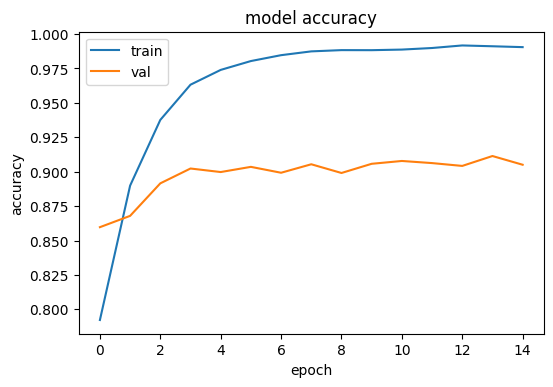

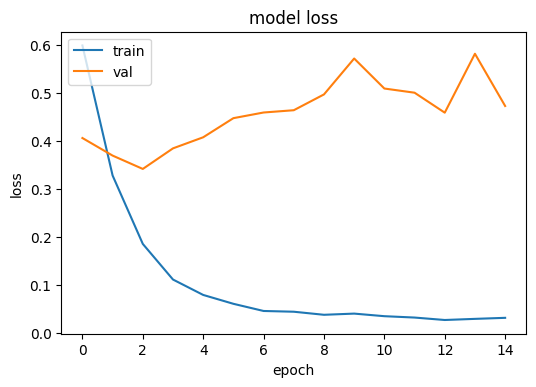

In [16]:
plt.figure(figsize = (6,4),dpi=100)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize = (6,4),dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
test_generator = test_datagen.flow_from_directory(directory="/content/drive/MyDrive/Miczone/fingerprint/data/test",target_size=(299,299),batch_size=7795,class_mode="sparse")

Found 7795 images belonging to 7 classes.


In [19]:
for Xtest,Ytest in test_generator:
  X_test = Xtest
  Y_test = Ytest
  break

In [20]:
pred = model.predict(X_test)
pred_idx = np.argmax(pred, axis=1)

In [21]:
print(classification_report(Y_test, pred_idx))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       695
         1.0       0.93      0.80      0.86       129
         2.0       0.96      0.97      0.97      3582
         3.0       0.85      0.81      0.83      1297
         4.0       0.84      0.81      0.83      1316
         5.0       0.79      0.72      0.75        76
         6.0       0.75      0.83      0.79       700

    accuracy                           0.90      7795
   macro avg       0.87      0.85      0.86      7795
weighted avg       0.90      0.90      0.90      7795



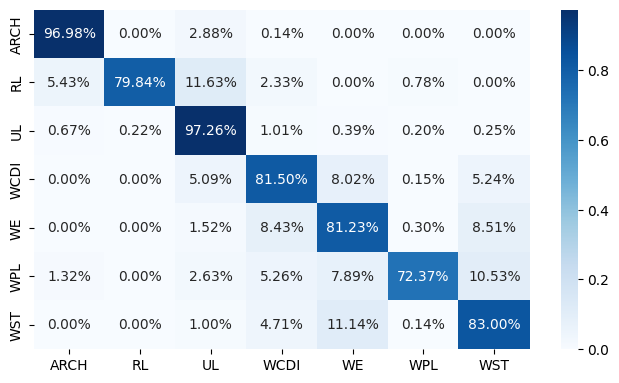

In [22]:
import pandas as pd
import seaborn as sns
cm = confusion_matrix(Y_test,pred_idx)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, index=['ARCH', 'RL','UL','WCDI','WE',"WPL","WST"], columns=['ARCH', 'RL','UL','WCDI','WE',"WPL","WST"])
plt.figure(figsize = (8,4.5),dpi=100)
sns.heatmap(df_cm, cmap="Blues", annot=True,fmt='.2%')
plt.show()